In [46]:
import os
import roboatenviro
from datetime import datetime, timedelta
import ast
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation
import seaborn as sns
from IPython.display import Markdown

token = "token"
api = roboatenviro.RoboatEnviro(token=token, endpoint="https://roboat-enviro.herokuapp.com/api/")

In [60]:
deployments_df = api.get_deployments(return_type="dataframe")
display(deployments_df)

deployment_name = 'Instrument and API Functionality Test - Take 4'
deployments_df = deployments_df[deployments_df['name'] == deployment_name]
display(Markdown("# Deployment name:\n" + ">" + deployment_name))
summary = deployments_df['summary'].values[0]
display(Markdown("# Deployment summary:\n" + ">" + summary))

https://roboat-enviro.herokuapp.com/api/v1/deployments token GET
<Response [200]>


,end_datetime,id,name,start_datetime,summary
0,"Tue, 04 Feb 2020 15:35:23 GMT",1,Instrument and API Functionality Test,"Tue, 04 Feb 2020 15:32:31 GMT",First TRF experiment w/ API
1,"Tue, 04 Feb 2020 20:28:51 GMT",13,Instrument and API Functionality Test - Take 2,"Tue, 04 Feb 2020 20:26:24 GMT",Switching the wavelength range from 200-270 to...
2,"Tue, 04 Feb 2020 20:40:47 GMT",14,Instrument and API Functionality Test - Take 3,"Tue, 04 Feb 2020 20:37:23 GMT",Switching the wavelength range from 226-306 to...
3,"Tue, 04 Feb 2020 20:56:38 GMT",15,Instrument and API Functionality Test - Take 4,"Tue, 04 Feb 2020 20:52:14 GMT",Switching the wavelength range from 206-326 to...


# Deployment name:
>Instrument and API Functionality Test - Take 4

# Deployment summary:
>Switching the wavelength range from 206-326 to 240-400.     Turned all lights off and used black pull screen closed.

In [61]:
"""
scan_set_df = api.get_trf_scan_set(
    "SN001", return_type="dataframe"
)
display(scan_set_df)

start_datetime = datetime.strptime(
    'Tue, 04 Feb 2020 20:52:14 GMT','%a, %d %b %Y %H:%M:%S %Z'
).isoformat()     

end_datetime = datetime.strptime(
    'Tue, 04 Feb 2020 20:56:38 GMT', '%a, %d %b %Y %H:%M:%S %Z'
).isoformat()

params = {
    "name": "Instrument and API Functionality Test - Take 4",
    "start_datetime": start_datetime,
    "end_datetime": end_datetime,
    "summary": "Switching the wavelength range from 206-326 to 240-400. \
    Turned all lights off and used black pull screen closed."
}
api.add_deployment(params=params)
display(api.get_deployments(return_type='dataframe'))
"""

'\nscan_set_df = api.get_trf_scan_set(\n    "SN001", return_type="dataframe"\n)\ndisplay(scan_set_df)\n\nstart_datetime = datetime.strptime(\n    \'Tue, 04 Feb 2020 20:52:14 GMT\',\'%a, %d %b %Y %H:%M:%S %Z\'\n).isoformat()     \n\nend_datetime = datetime.strptime(\n    \'Tue, 04 Feb 2020 20:56:38 GMT\', \'%a, %d %b %Y %H:%M:%S %Z\'\n).isoformat()\n\nparams = {\n    "name": "Instrument and API Functionality Test - Take 4",\n    "start_datetime": start_datetime,\n    "end_datetime": end_datetime,\n    "summary": "Switching the wavelength range from 206-326 to 240-400.     Turned all lights off and used black pull screen closed."\n}\napi.add_deployment(params=params)\ndisplay(api.get_deployments(return_type=\'dataframe\'))\n'

In [4]:
scan_set_df = api.get_trf_scan_set(
    "SN001", return_type="dataframe",
    params=dict(
        filter=
            "start_datetime,ge,{0};\
            end_datetime,le,{1}".format(start_datetime, end_datetime)
    )
)
display(scan_set_df)

https://roboat-enviro.herokuapp.com/api/v1/trf-scan-sets/ token GET
<Response [200]>


,end_datetime,end_wl,id,mcr_grating,mcr_serial_num,mcr_units,pico_analog_offset,pico_autotrig_timeout,pico_bandwidth_limiter,pico_coupling_type,...,pico_sampling_channel,pico_timebase,pico_trig_channel,pico_trig_delay,pico_trig_dir,pico_trig_thresh,pico_voltage_range,sensor_sn,start_datetime,start_wl
0,"Tue, 04 Feb 2020 20:52:24 GMT",400,46,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:52:14 GMT",240
1,"Tue, 04 Feb 2020 20:52:57 GMT",400,47,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:52:48 GMT",240
2,"Tue, 04 Feb 2020 20:53:26 GMT",400,48,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:53:17 GMT",240
3,"Tue, 04 Feb 2020 20:53:53 GMT",400,49,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:53:44 GMT",240
4,"Tue, 04 Feb 2020 20:54:20 GMT",400,50,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:54:12 GMT",240
5,"Tue, 04 Feb 2020 20:56:10 GMT",400,54,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:56:01 GMT",240
6,"Tue, 04 Feb 2020 20:54:48 GMT",400,51,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:54:39 GMT",240
7,"Tue, 04 Feb 2020 20:55:16 GMT",400,52,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:55:07 GMT",240
8,"Tue, 04 Feb 2020 20:55:42 GMT",400,53,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:55:34 GMT",240
9,"Tue, 04 Feb 2020 20:56:38 GMT",400,55,1,23721,Nanometers,0,0,0,2,...,A,0,Aux,0,2,64,5,SN001,"Tue, 04 Feb 2020 20:56:30 GMT",240


In [5]:
set_ids = scan_set_df.id.unique().tolist()
set_ids = ','.join(map(str, set_ids))

#remove and calculate from timebase
df = pd.read_csv('example_tr_decay.csv')
time_ns = df['time (ns)']

scans_df = api.get_trf_data(
    sn="SN001", return_type="dataframe",
    params=dict(filter="scan_set_id,in,{0}".format(set_ids))
)

scans_df['trf_scan'] = scans_df['trf_scan'].apply(ast.literal_eval)
scans_df['trf_scan'] = np.array(scans_df['trf_scan'])
scans_df['time_ns'] = [df['time (ns)'].to_numpy()] * len(scans_df)
scans_df['comb'] = scans_df.apply(lambda x: list(zip(x['time_ns'], x['trf_scan'])), axis=1)

https://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
<Response [200]>
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ token GET
http://roboat-enviro.herokuapp.com/api/v1/raw-trf-data/ to

<IPython.core.display.Javascript object>


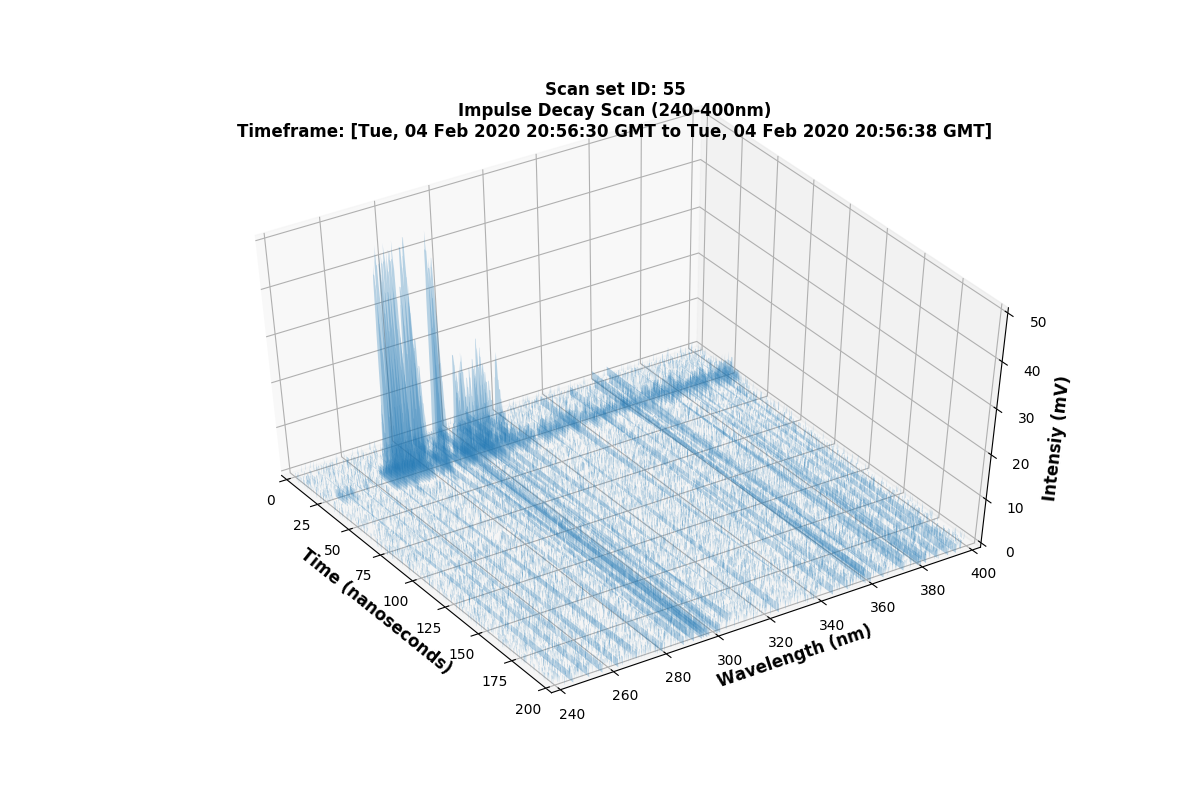

In [6]:
%matplotlib notebook

gp = scans_df.groupby('scan_set_id')

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    scan_set_id = list(gp.groups)[i]
    group = gp.get_group(scan_set_id)

    ax.clear()
    xs = group['time_ns'].values[0]
    ys = group['comb'].values.tolist()
    zs = range(group['mcr_wl'].min(), group['mcr_wl'].max()+1)
    
    poly = PolyCollection(ys)
    poly.set_alpha(0.3)
    ax.add_collection3d(poly, zs=zs, zdir='y')

    ax.set_xlabel('Time (nanoseconds)', fontsize=12, fontweight="bold")
    #remove hardcoded limits for time
    #ax.set_xlim3d(xs.min(), xs.max())
    ax.set_xlim3d(0, 200)
    ax.set_ylabel('Wavelength (nm)', fontsize=12, fontweight="bold")
    ax.set_ylim3d(zs[0], zs[-1])
    ax.set_zlabel('Intensiy (mV)', fontsize=12, fontweight="bold")
    #remove hardcoded limits for intensity... calculate from global max in scan set
    ax.set_zlim3d(0, 50)
    title_str = "Scan set ID: {0}\nImpulse Decay Scan ({1}-{2}nm)\nTimeframe: [{3} to {4}]".format(
        scan_set_id,    
        group['mcr_wl'].min(),group['mcr_wl'].max(),
        group['scan_datetime'].min(), group['scan_datetime'].max()
    )
    ax.set_title(title_str, fontsize=12, fontweight="bold")

    return

anim = animation.FuncAnimation(fig, animate, frames=gp.ngroups, init_func=init, interval=500, blit=True)

In [18]:
for name, group in gp:
    for index, row in group.iterrows():
        display(len(row['time_ns']), len(row['trf_scan']))
        break
    break

"""
df = pd.pivot_table(data=sns.load_dataset("flights"),
                    index='month',
                    values='passengers',
                    columns='year')
display(df.head())

fig = plt.figure()
sns.heatmap(df)
plt.show()
"""

1550

1000

'\ndf = pd.pivot_table(data=sns.load_dataset("flights"),\n                    index=\'month\',\n                    values=\'passengers\',\n                    columns=\'year\')\ndisplay(df.head())\n\nfig = plt.figure()\nsns.heatmap(df)\nplt.show()\n'